In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")

In [3]:
df.head(5)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


# NUMBER OF NUMERICAL AND CATEGORICAL FEATURES

In [4]:
num, obj = 0,0
for feature in df.columns:
    if df.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features.')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 64 numerical features and 38 categorical features.


<Figure size 800x600 with 0 Axes>

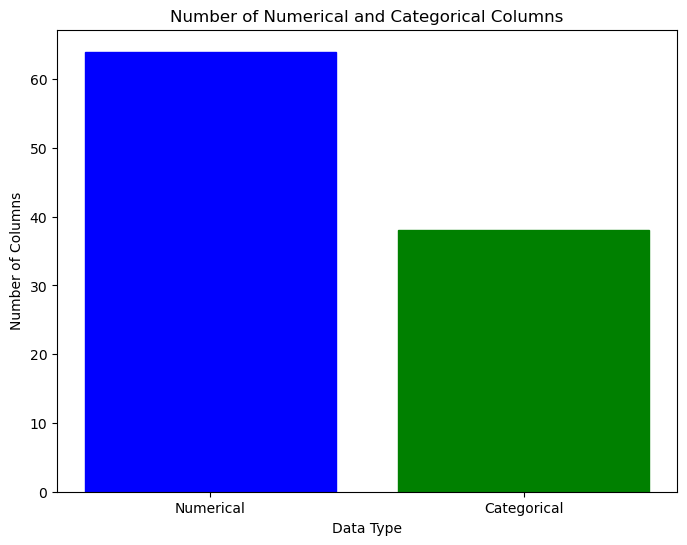

In [5]:
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(['Numerical', 'Categorical'], [num, obj])
bars[0].set_color('b')  # Blue for numerical
bars[1].set_color('g') 
plt.xlabel('Data Type')
plt.ylabel('Number of Columns')
plt.title('Number of Numerical and Categorical Columns')

# Show the plot
plt.show()

# CHECKING FOR DUPLICATES

In [6]:
row, column = df[df.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


# CHECKING FOR MISSING VALUES

In [7]:
gtr45_lst = []  # List to store feature with more than 45% missing value
lsr45_lst = []  # List to store feature with less than 45% missing value
no_lst=[]


for feature in df:
    if (df[feature].isnull().mean()*100) > 45.0:
        gtr45_lst.append(feature)
    elif 0.000 < (df[feature].isnull().mean()*100) < 45.0:  
        lsr45_lst.append(feature)
    else:
        no_lst.append(feature)
print(f'There are {len(gtr45_lst)} features that has more than 45% missing value.')
print(f'There are {len(lsr45_lst)} features that has less than 45% missing value.')
print(f'There are {len(no_lst)} features that has no missing value.')

There are 29 features that has more than 45% missing value.
There are 32 features that has less than 45% missing value.
There are 41 features that has no missing value.


# CHECKING FOR MISSING VALUES PERCENTAGE

In [8]:
Missing_value_percentage=(df.isnull().sum()/len(df))*100

threshold= 45

Columns_with_more_than_45percent_missingval=Missing_value_percentage[Missing_value_percentage > threshold]

missing_columns_df = pd.DataFrame({'Column': Columns_with_more_than_45percent_missingval.index, 
                                   'Missing Percentage': Columns_with_more_than_45percent_missingval.values})

Columns_with_more_than_45percent_missingval.sort_values(ascending=False)

DefTwoPoint          99.994113
BlockingPlayer       99.971302
TwoPointConv         99.851602
ChalReplayResult     99.165538
RecFumbPlayer        98.927366
RecFumbTeam          98.927366
Interceptor          98.891309
FieldGoalDistance    97.805184
FieldGoalResult      97.777958
ExPointResult        97.520162
PenaltyType          95.970693
ReturnResult         95.526481
PuntResult           94.512716
Returner             93.793293
PenalizedPlayer      93.062097
PenalizedTeam        92.764320
Tackler2             87.800720
RunGap               78.555170
RunLocation          70.685917
Rusher               70.427386
yacWPA               61.017739
airWPA               60.953720
yacEPA               60.952984
airEPA               60.927474
Receiver             60.371411
PassLocation         58.996095
PassLength           58.996095
Passer               58.879584
PassOutcome          58.747375
dtype: float64

<Axes: >

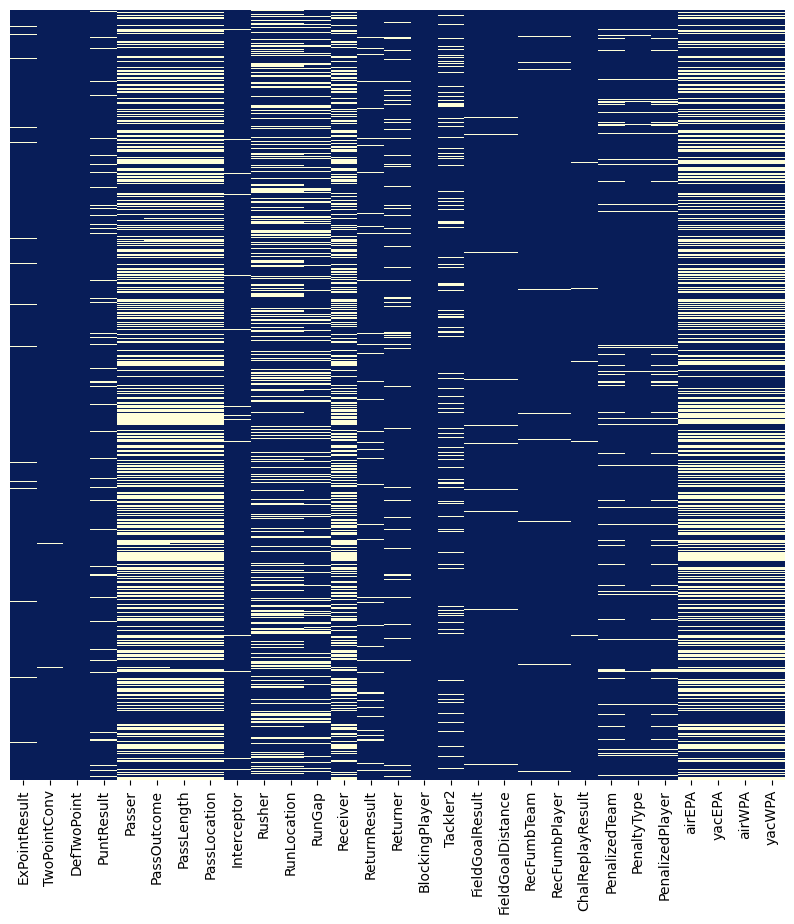

In [9]:
df[Columns_with_more_than_45percent_missingval.index.tolist()]
plt.figure(figsize=(10,10))

sns.heatmap(df[Columns_with_more_than_45percent_missingval.index.tolist()].isnull(), 
            yticklabels = False, cbar=False, cmap='YlGnBu')

# As per our observation and a max threshold of 45% missing values. The following columns are to be dropped

In [10]:
columns_to_drop=Columns_with_more_than_45percent_missingval.index.tolist()
columns_to_drop

['ExPointResult',
 'TwoPointConv',
 'DefTwoPoint',
 'PuntResult',
 'Passer',
 'PassOutcome',
 'PassLength',
 'PassLocation',
 'Interceptor',
 'Rusher',
 'RunLocation',
 'RunGap',
 'Receiver',
 'ReturnResult',
 'Returner',
 'BlockingPlayer',
 'Tackler2',
 'FieldGoalResult',
 'FieldGoalDistance',
 'RecFumbTeam',
 'RecFumbPlayer',
 'ChalReplayResult',
 'PenalizedTeam',
 'PenaltyType',
 'PenalizedPlayer',
 'airEPA',
 'yacEPA',
 'airWPA',
 'yacWPA']

# DATA DROPING

In [11]:
df = df.drop(columns=columns_to_drop)

In [12]:
df.shape

(407688, 73)

# NUMBER OF UNIQUE CATEGORICAL FEATURES

In [13]:
s_cunique = 0
n_cunique = 0

for feature in df:
    if df[feature].dtype == 'O' : 
        if len(df[feature].unique())==1:
            s_cunique += 1
        else:
            n_cunique += 1

print(f'There are {s_cunique} categorical features that has one unique value.')
print(f'There are {n_cunique} categorical features that has more than one unique value.')

There are 0 categorical features that has one unique value.
There are 14 categorical features that has more than one unique value.


In [14]:
object_columns = df.select_dtypes(include=['object'])
object_columns

,Date,time,SideofField,posteam,DefensiveTeam,desc,PlayType,Passer_ID,Rusher_ID,Receiver_ID,Tackler1,HomeTeam,AwayTeam,Timeout_Team
0,2009-09-10,15:00,TEN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,Kickoff,None,None,None,M.Griffin,PIT,TEN,None
1,2009-09-10,14:53,PIT,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,Pass,00-0022924,None,00-0017162,C.Hope,PIT,TEN,None
2,2009-09-10,14:16,PIT,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,Run,None,00-0022250,None,S.Tulloch,PIT,TEN,None
3,2009-09-10,13:35,PIT,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,Pass,00-0022924,None,00-0026901,NaN,PIT,TEN,None
4,2009-09-10,13:27,PIT,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,Punt,None,None,None,NaN,PIT,TEN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,00:28,BAL,NaN,NaN,Timeout #1 by BAL at 00:28.,Timeout,None,None,None,NaN,BAL,CIN,BAL
407684,2017-12-31,00:28,BAL,BAL,CIN,(:28) (Shotgun) J.Flacco pass incomplete short...,Pass,00-0026158,None,00-0026901,NaN,BAL,CIN,None
407685,2017-12-31,00:24,BAL,BAL,CIN,(:24) (Shotgun) J.Flacco pass short middle to ...,Pass,00-0026158,None,00-0022943,V.Rey,BAL,CIN,None
407686,2017-12-31,00:14,BAL,CIN,BAL,(:14) A.Dalton kneels to BAL 37 for -1 yards.,QB Kneel,None,00-0027973,None,NaN,BAL,CIN,None


In [15]:
object_columns.isnull().sum()

Date                  0
time                224
SideofField         528
posteam           24992
DefensiveTeam     24992
desc                  2
PlayType              0
Passer_ID             0
Rusher_ID             0
Receiver_ID           0
Tackler1         166134
HomeTeam              0
AwayTeam              0
Timeout_Team          0
dtype: int64

<Axes: >

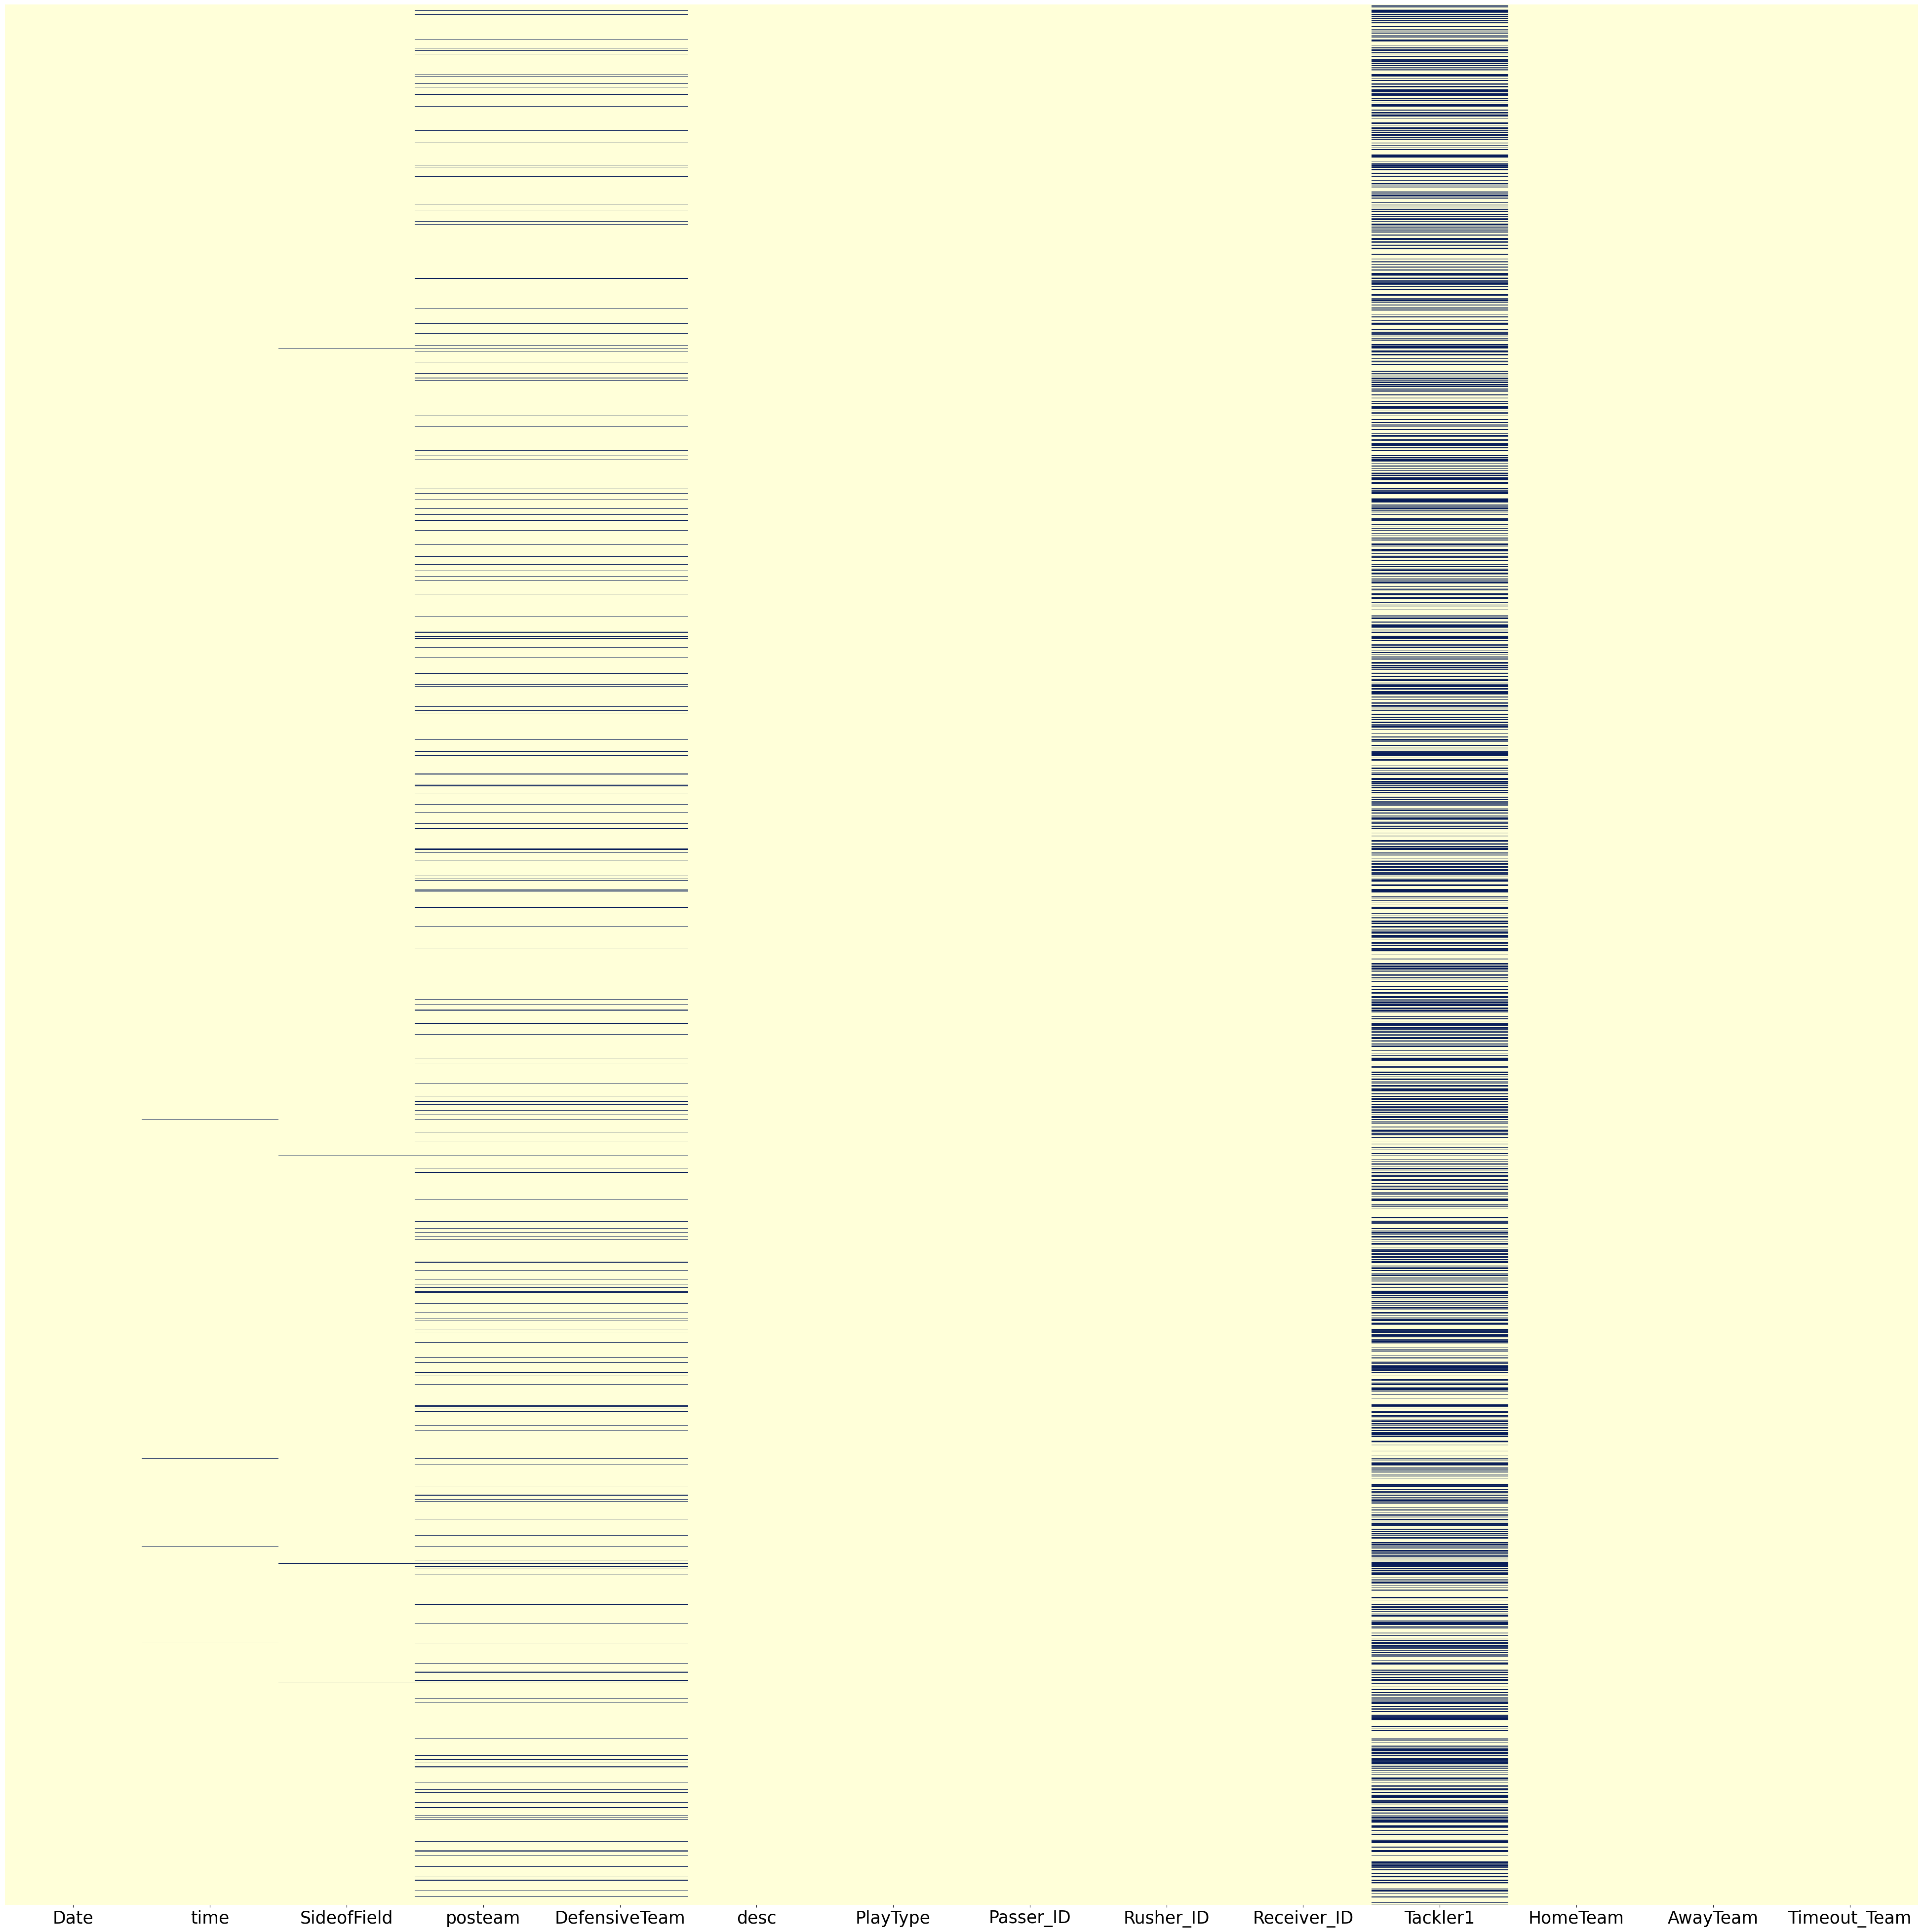

In [16]:
plt.figure(figsize=(50,50))
plt.xticks(fontsize=25)

sns.heatmap(object_columns.isnull(), 
            yticklabels = False, cbar=False, cmap='YlGnBu')

# MISSING VALUE TREATMENT FOR CATEGORICAL FEATURES

In [17]:
df['time_column'] = pd.to_datetime(df['time'])
df = df.drop(columns='time')


In [18]:
df['Datecol'] = pd.to_datetime(df['Date'])
df = df.drop(columns='Date')

In [19]:
df.dropna(subset=['time_column'], inplace=True)
df['time_column'].isnull().sum()

0

In [20]:
team=['SideofField','posteam','DefensiveTeam','HomeTeam','AwayTeam','Timeout_Team']

team_uni={}
for column in team:
    team_uni[column] = df[column].unique()
    
team_uni

{'SideofField': array(['TEN', 'PIT', 'MID', 'MIN', 'CLE', 'DET', 'NO', 'TB', 'DAL', 'NYJ',
        'HOU', 'JAC', 'IND', 'CIN', 'DEN', nan, 'PHI', 'CAR', 'BAL', 'KC',
        'MIA', 'ATL', 'SF', 'ARI', 'SEA', 'STL', 'WAS', 'NYG', 'CHI', 'GB',
        'BUF', 'NE', 'SD', 'OAK', '50', 'LA', 'JAX', 'LAC'], dtype=object),
 'posteam': array(['PIT', 'TEN', nan, 'CLE', 'MIN', 'NO', 'DET', 'DAL', 'TB', 'HOU',
        'NYJ', 'IND', 'JAC', 'DEN', 'CIN', 'CAR', 'PHI', 'KC', 'BAL',
        'ATL', 'MIA', 'ARI', 'SF', 'STL', 'SEA', 'NYG', 'WAS', 'GB', 'CHI',
        'NE', 'BUF', 'OAK', 'SD', 'LA', 'JAX', 'LAC'], dtype=object),
 'DefensiveTeam': array(['TEN', 'PIT', nan, 'MIN', 'CLE', 'DET', 'NO', 'TB', 'DAL', 'NYJ',
        'HOU', 'JAC', 'IND', 'CIN', 'DEN', 'PHI', 'CAR', 'BAL', 'KC',
        'MIA', 'ATL', 'SF', 'ARI', 'SEA', 'STL', 'WAS', 'NYG', 'CHI', 'GB',
        'BUF', 'NE', 'SD', 'OAK', 'LA', 'JAX', 'LAC'], dtype=object),
 'HomeTeam': array(['PIT', 'CLE', 'NO', 'TB', 'HOU', 'IND', 'CIN', 'CAR', 

In [21]:
for i in team:    
    df[i].fillna('Unknown', inplace=True)
    

# Since the columns desc,Tackler1 has no significant information we can drop it

In [22]:
df = df.drop(columns=['desc','Tackler1'])

In [23]:
df.select_dtypes(include=['object']).isnull().sum()

SideofField      0
posteam          0
DefensiveTeam    0
PlayType         0
Passer_ID        0
Rusher_ID        0
Receiver_ID      0
HomeTeam         0
AwayTeam         0
Timeout_Team     0
dtype: int64

In [24]:
object_columns = df.select_dtypes(include=['object'])
object_columns

,SideofField,posteam,DefensiveTeam,PlayType,Passer_ID,Rusher_ID,Receiver_ID,HomeTeam,AwayTeam,Timeout_Team
0,TEN,PIT,TEN,Kickoff,None,None,None,PIT,TEN,None
1,PIT,PIT,TEN,Pass,00-0022924,None,00-0017162,PIT,TEN,None
2,PIT,PIT,TEN,Run,None,00-0022250,None,PIT,TEN,None
3,PIT,PIT,TEN,Pass,00-0022924,None,00-0026901,PIT,TEN,None
4,PIT,PIT,TEN,Punt,None,None,None,PIT,TEN,None
...,...,...,...,...,...,...,...,...,...,...
407683,BAL,Unknown,Unknown,Timeout,None,None,None,BAL,CIN,BAL
407684,BAL,BAL,CIN,Pass,00-0026158,None,00-0026901,BAL,CIN,None
407685,BAL,BAL,CIN,Pass,00-0026158,None,00-0022943,BAL,CIN,None
407686,BAL,CIN,BAL,QB Kneel,None,00-0027973,None,BAL,CIN,None


# CHECKING FOR MULTICOLLINEARITY

# NUMBER OF UNIQUE NUMERICAL FEATURES

In [25]:
s_nunique = 0
n_nunique = 0
for feature in df:
    if df[feature].dtype != 'O':
        if len(df[feature].unique())==1:
            s_nunique += 1
        else:
            n_nunique += 1

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 1 numerical features that has one unique value including Nan
There are 60 numerical features that has more than one unique value


In [26]:
num_columns = df.select_dtypes(include=['number'])
num_columns

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season
0,2009091000,1,1,NaN,15,3600.0,0.0,30.0,30.0,0,0,0.0,NaN,1,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,2009
1,2009091000,1,1,1.0,15,3593.0,7.0,42.0,58.0,10,5,0.0,0.0,1,5,0,0,0,0,1,-3,8,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,2009
2,2009091000,1,1,2.0,15,3556.0,37.0,47.0,53.0,5,2,0.0,0.0,1,-3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,2009
3,2009091000,1,1,3.0,14,3515.0,41.0,44.0,56.0,8,2,0.0,0.0,1,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,2009
4,2009091000,1,1,4.0,14,3507.0,8.0,44.0,56.0,8,2,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017123101,29,4,NaN,1,28.0,4.0,32.0,32.0,0,-4,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,0,3,0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,2017
407684,2017123101,29,4,3.0,1,28.0,0.0,23.0,77.0,14,-4,0.0,0.0,1,0,0,0,0,0,1,12,0,0,0,0,0,0,0,0,0,0,27.0,30.0,-3.0,3.0,0,2,2,0,2,0,0.742694,0.061718,0.003741,0.044487,0.080918,0.000579,0.065863,0.0,0.0,0.200905,-0.340818,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,2017
407685,2017123101,29,4,4.0,1,24.0,4.0,23.0,77.0,14,9,0.0,1.0,1,13,0,0,0,0,1,10,3,0,0,0,1,0,0,0,0,0,27.0,30.0,-3.0,3.0,0,2,2,0,2,0,0.770662,0.078899,0.003987,0.053288,0.042817,0.000622,0.049726,0.0,0.0,-0.139913,0.139913,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,2017
407686,2017123101,30,4,1.0,1,14.0,10.0,36.0,36.0,10,-1,0.0,0.0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,27.0,3.0,3.0,0,0,2,0,2,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,2017


In [27]:
num_columns.isnull().sum()

GameID                             0
Drive                              0
qtr                                0
down                           60930
TimeUnder                          0
TimeSecs                           0
PlayTimeDiff                     220
yrdln                            831
yrdline100                       831
ydstogo                            0
ydsnet                             0
GoalToGo                         831
FirstDown                      28804
PlayAttempted                      0
Yards.Gained                       0
sp                                 0
Touchdown                          0
Safety                             0
Onsidekick                         0
PassAttempt                        0
AirYards                           0
YardsAfterCatch                    0
QBHit                              0
InterceptionThrown                 0
RushAttempt                        0
Reception                          0
Fumble                             0
S

<Axes: >

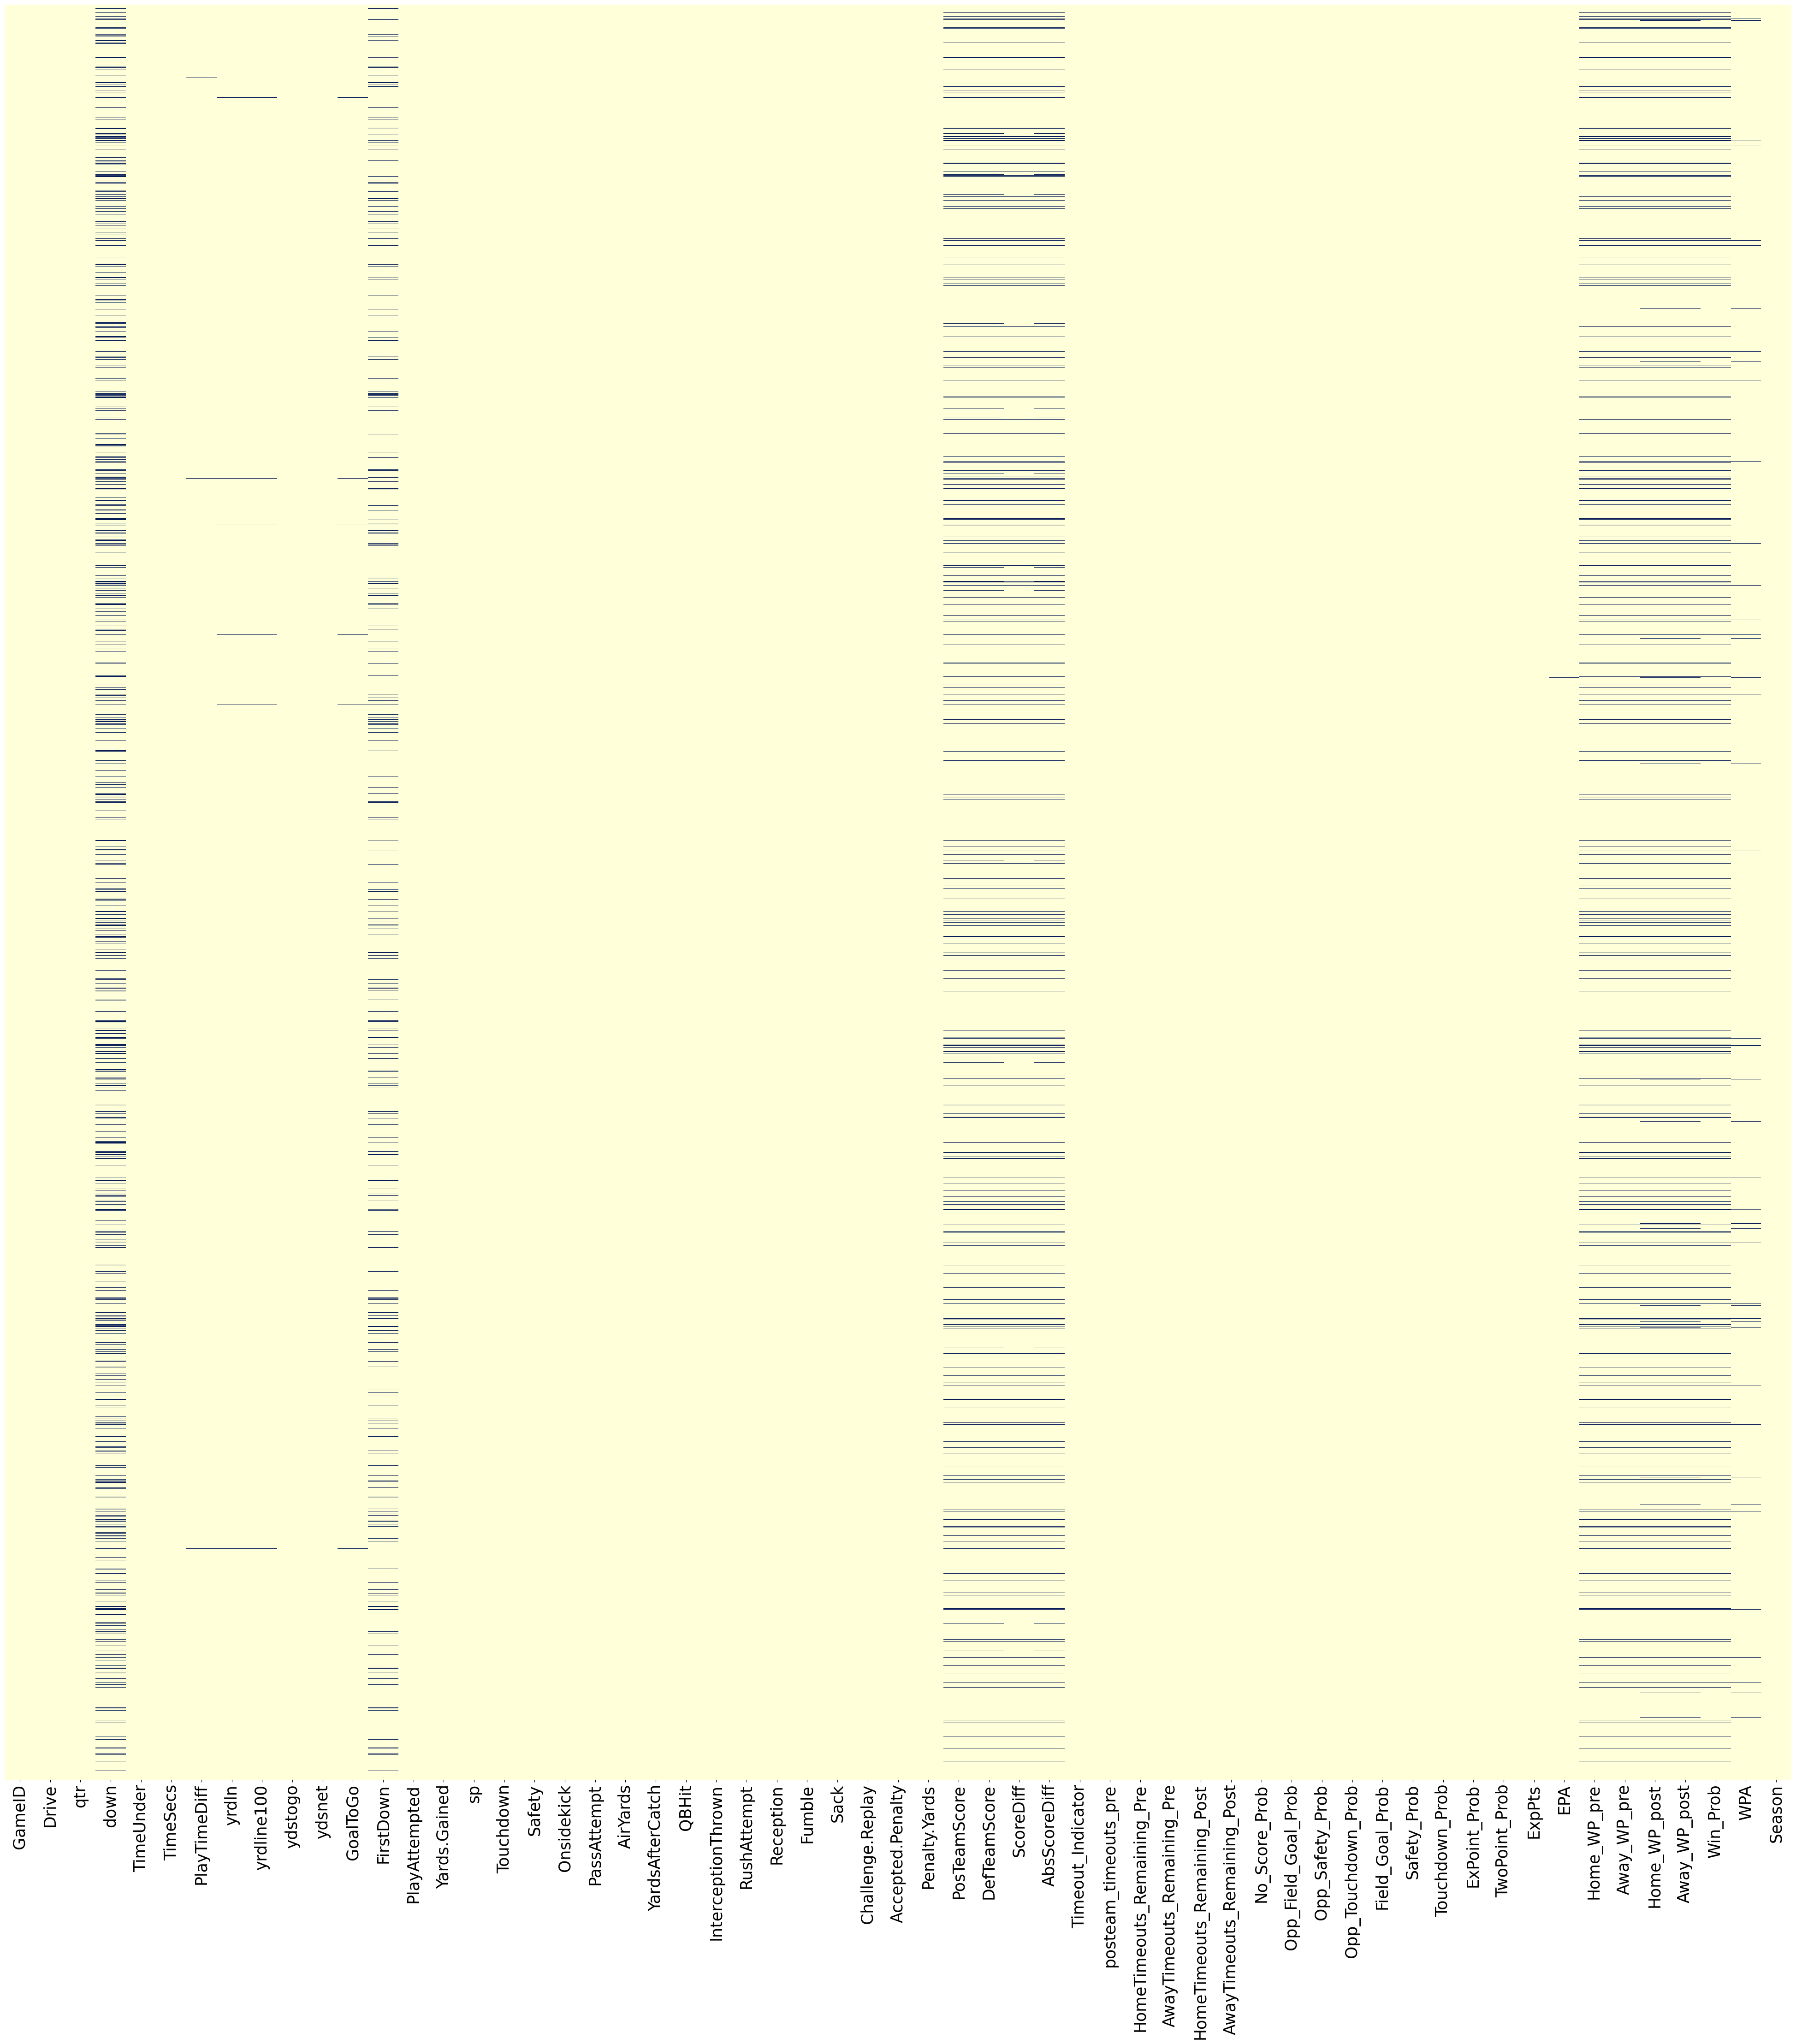

In [28]:
plt.figure(figsize=(50,50))
plt.xticks(fontsize=25)

sns.heatmap(num_columns.isnull(), 
            yticklabels = False, cbar=False, cmap='YlGnBu')

# MISSING VALUE TREATMENT FOR NUMERICAL FEATURES

In [29]:
for column in num_columns:
    imputation_value = df[column].mean()
    
    df[column].fillna(imputation_value, inplace=True)

In [30]:
df.isnull().sum()

GameID         0
Drive          0
qtr            0
down           0
TimeUnder      0
              ..
Win_Prob       0
WPA            0
Season         0
time_column    0
Datecol        0
Length: 71, dtype: int64

# EDA

# Outlier Detection

In [31]:
numerical_columns = df.select_dtypes(include=['number'])
non_binary_numerical_columns = []

for column in numerical_columns:
    unique_values = df[column].unique()
    if len(unique_values) > 2 or not (0 in unique_values and 1 in unique_values):
        non_binary_numerical_columns.append(column)

In [32]:
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [33]:
columns_with_outliers = []

for column in non_binary_numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    if not outliers.empty:
        columns_with_outliers.append(column)
print("Columns with Outliers:")
print(columns_with_outliers)

Columns with Outliers:
['PlayTimeDiff', 'ydstogo', 'ydsnet', 'GoalToGo', 'Yards.Gained', 'AirYards', 'YardsAfterCatch', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff', 'AbsScoreDiff', 'posteam_timeouts_pre', 'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre', 'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post', 'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Field_Goal_Prob', 'Safety_Prob', 'Touchdown_Prob', 'ExPoint_Prob', 'TwoPoint_Prob', 'ExpPts', 'EPA', 'WPA']


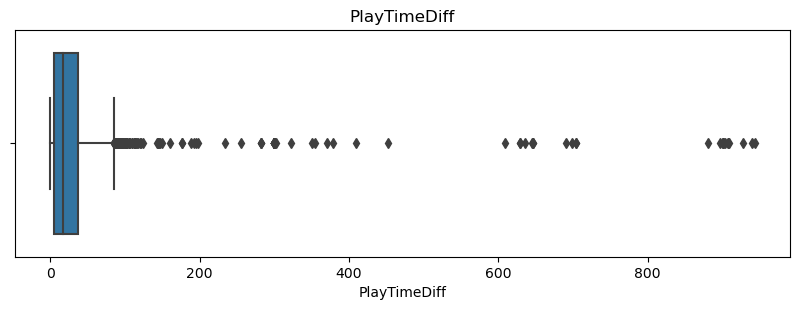

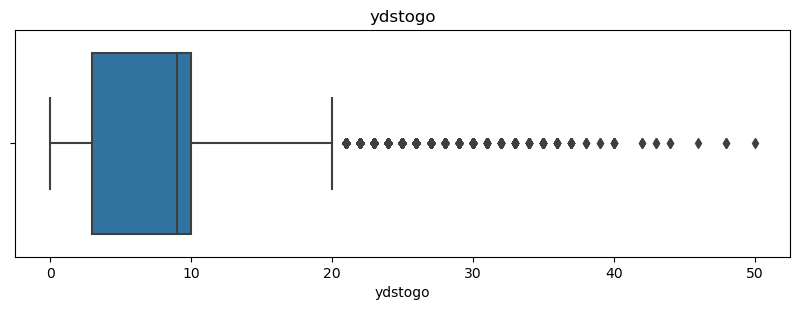

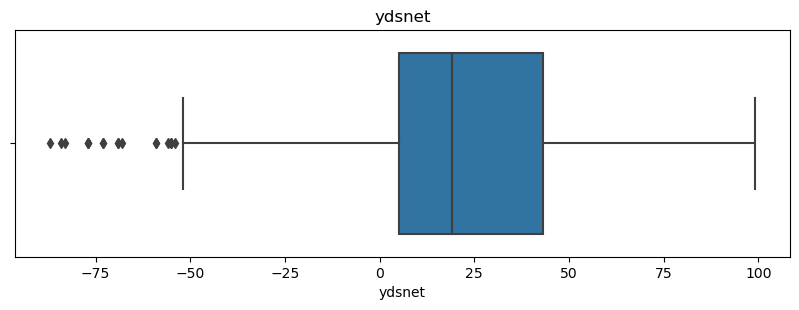

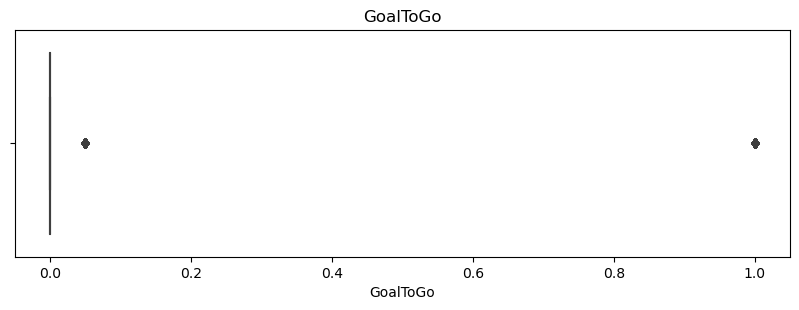

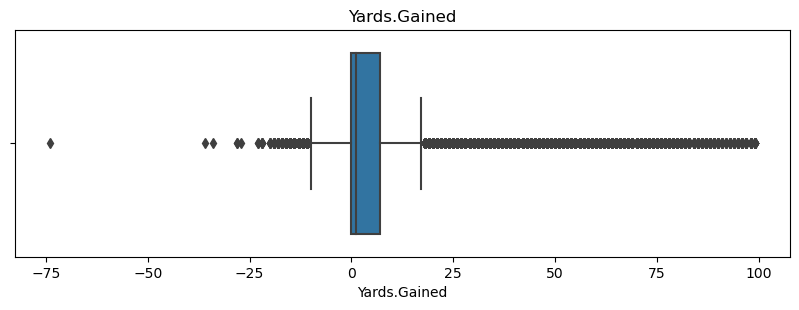

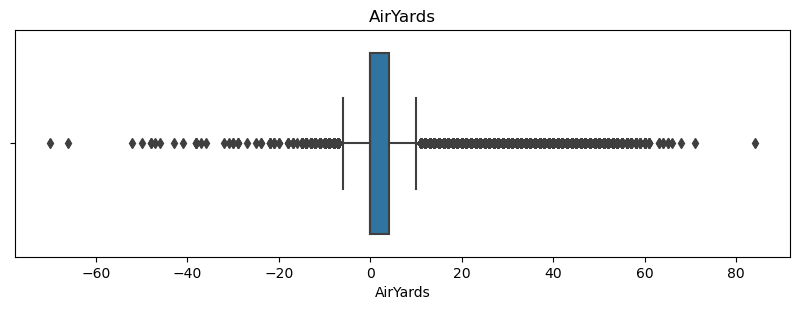

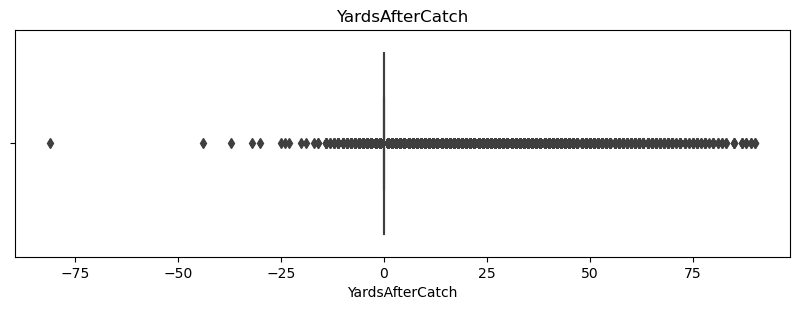

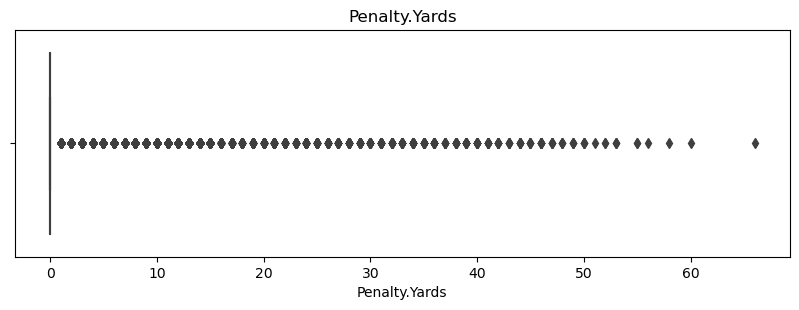

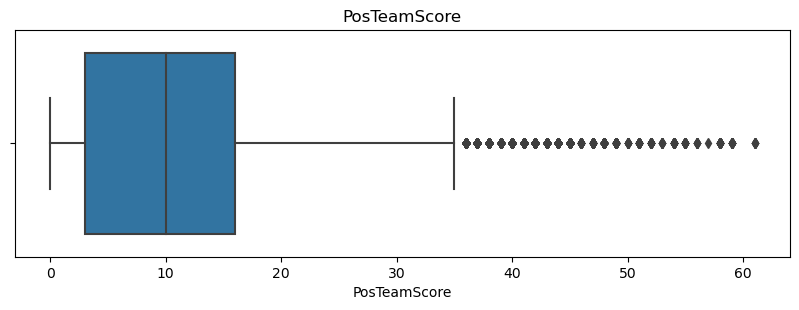

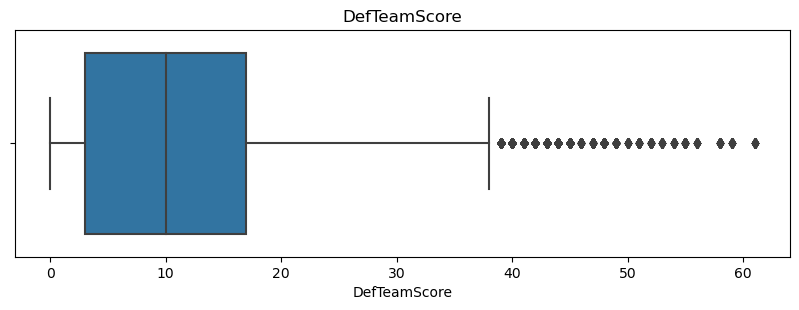

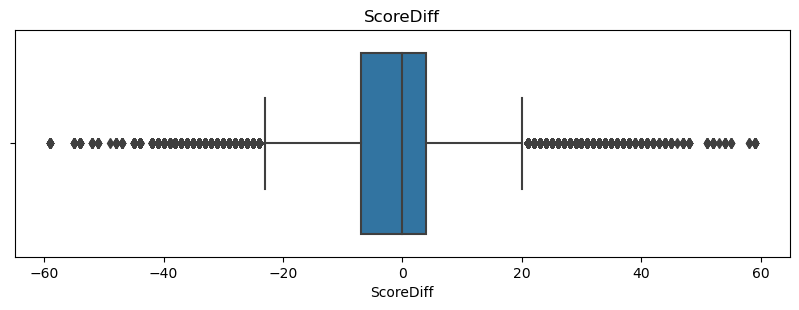

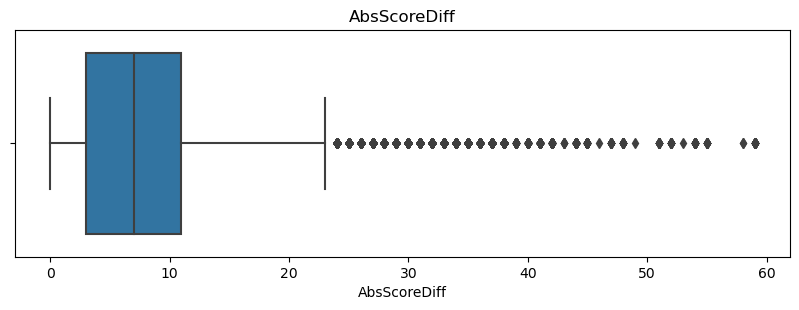

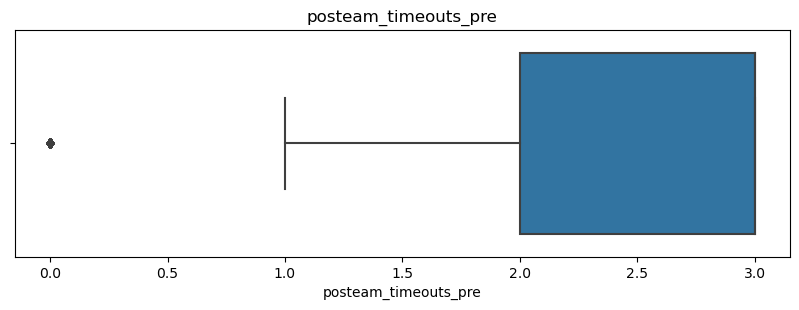

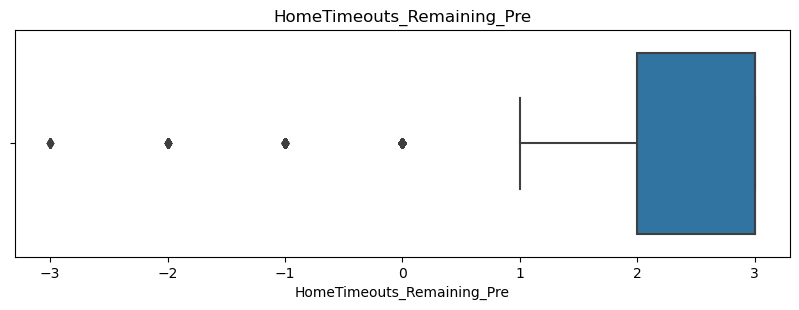

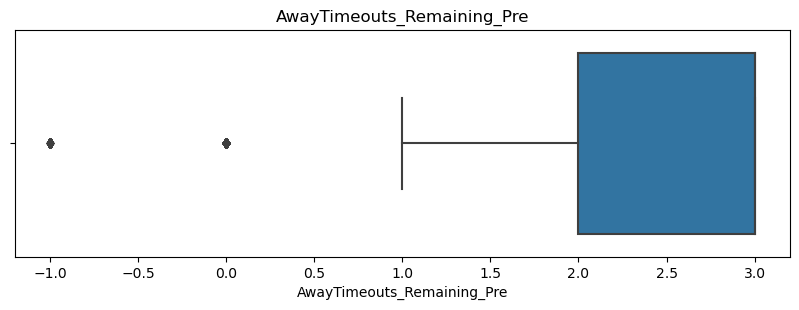

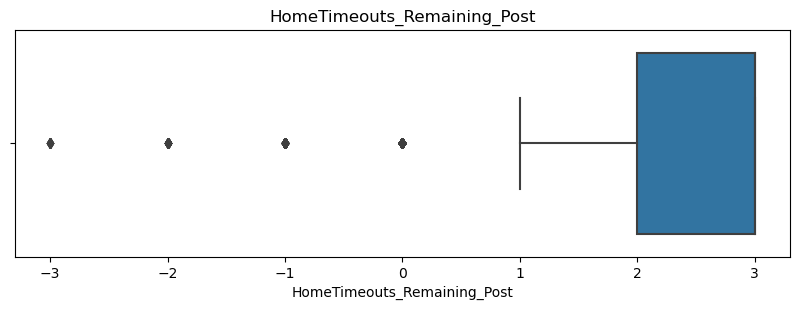

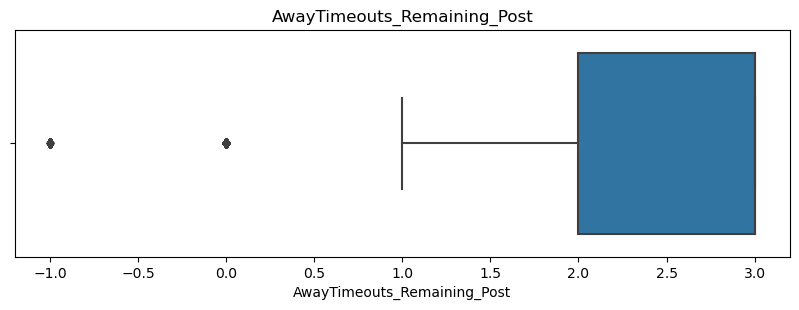

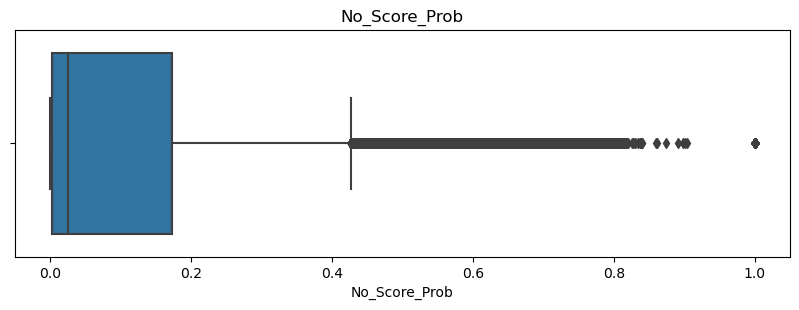

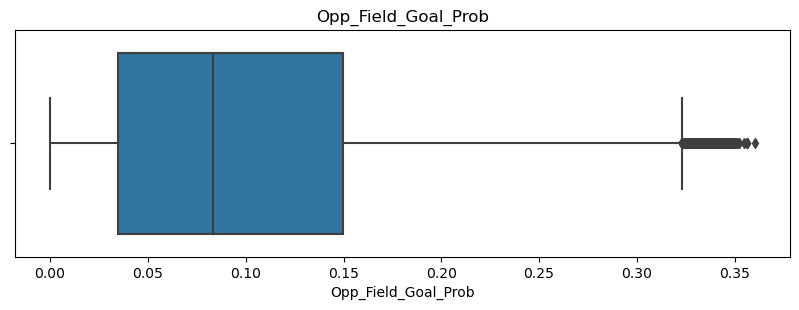

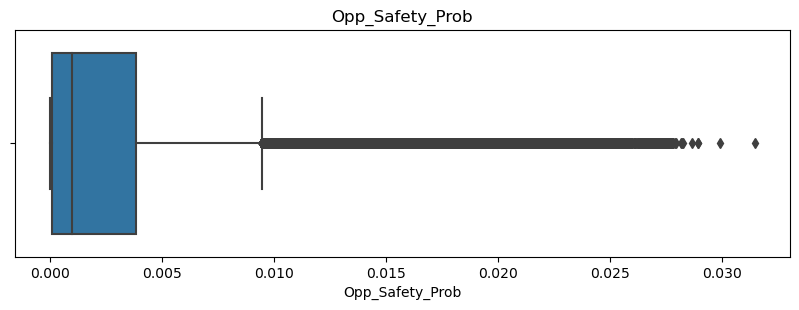

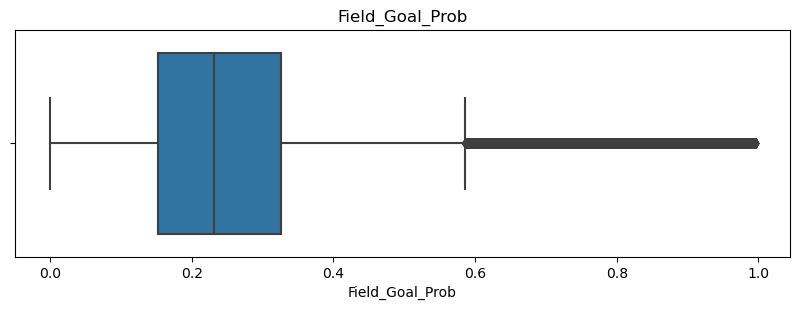

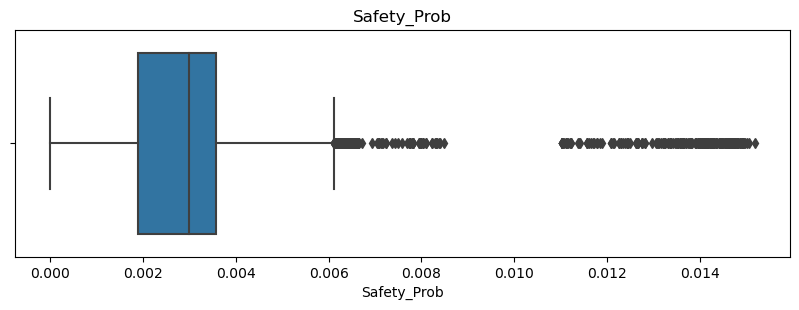

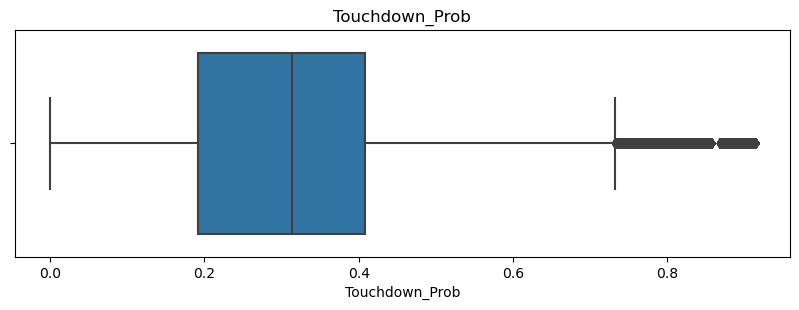

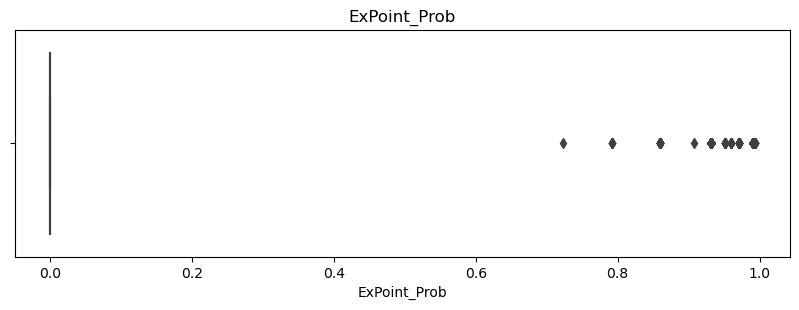

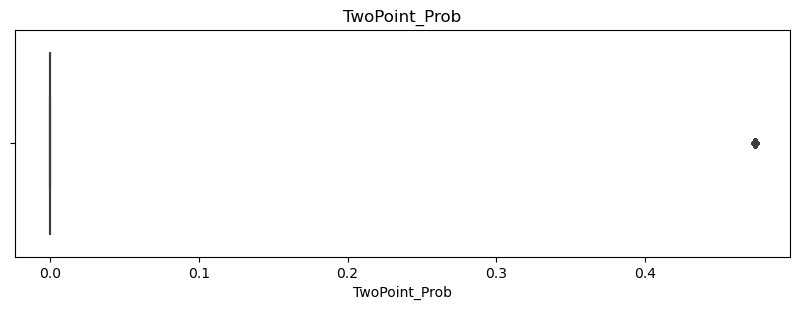

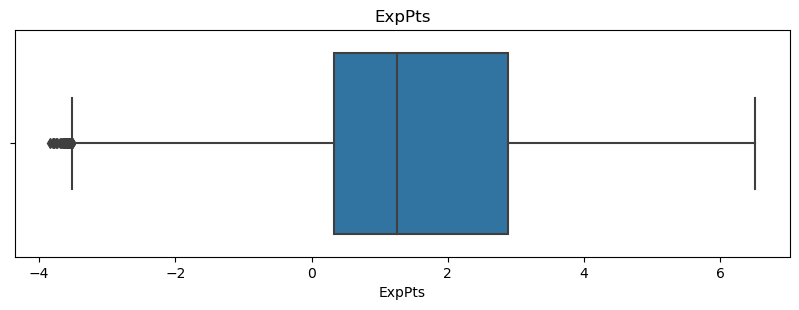

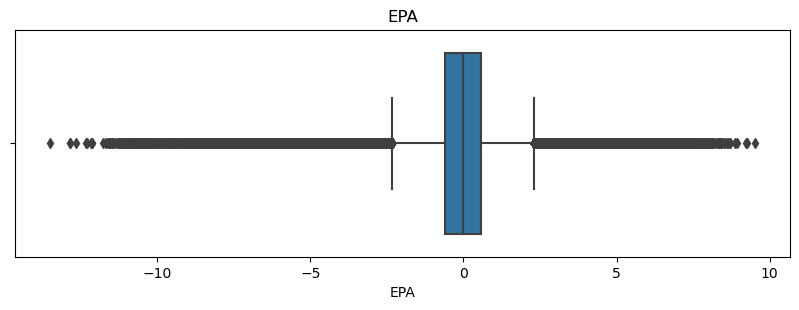

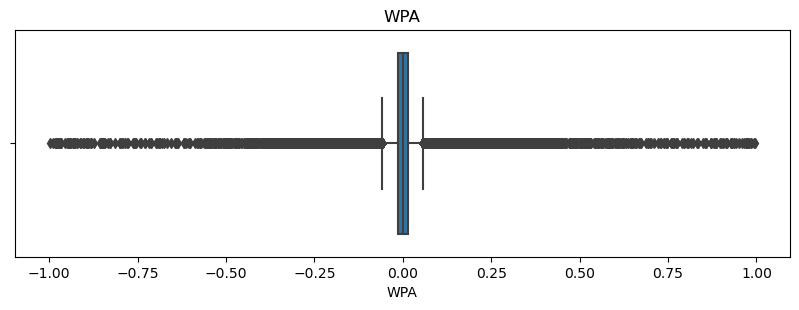

In [34]:
for i in columns_with_outliers:
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    plt.title(i)

    sns.boxplot(x=df[i])
    plt.show()

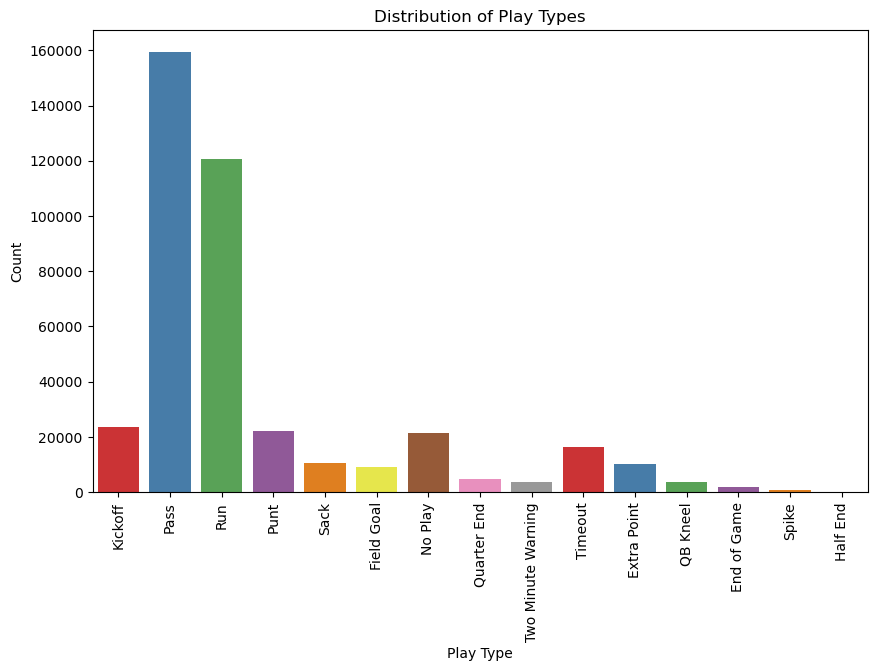

In [35]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='PlayType', palette='Set1') 
plt.xticks(rotation=90)
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.title('Distribution of Play Types')
plt.show()

Majority of the play types are Pass and Run

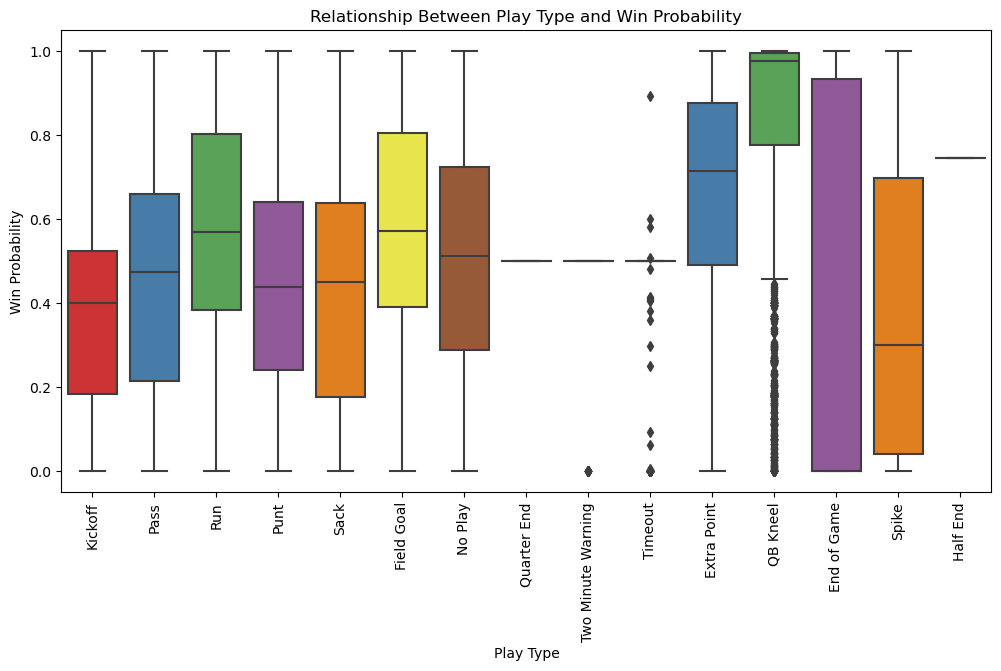

In [36]:
Win_Prob = df[df['Win_Prob'].notnull()]
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(data=df, x='PlayType', y='Win_Prob', palette='Set1')  # Adjust columns and color palette
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.xlabel('Play Type')
plt.ylabel('Win Probability')
plt.title('Relationship Between Play Type and Win Probability')
plt.show()

Highest win probabilty is for QB Kneel followed by End of Game Play type

# HomeTeam advantage For winning

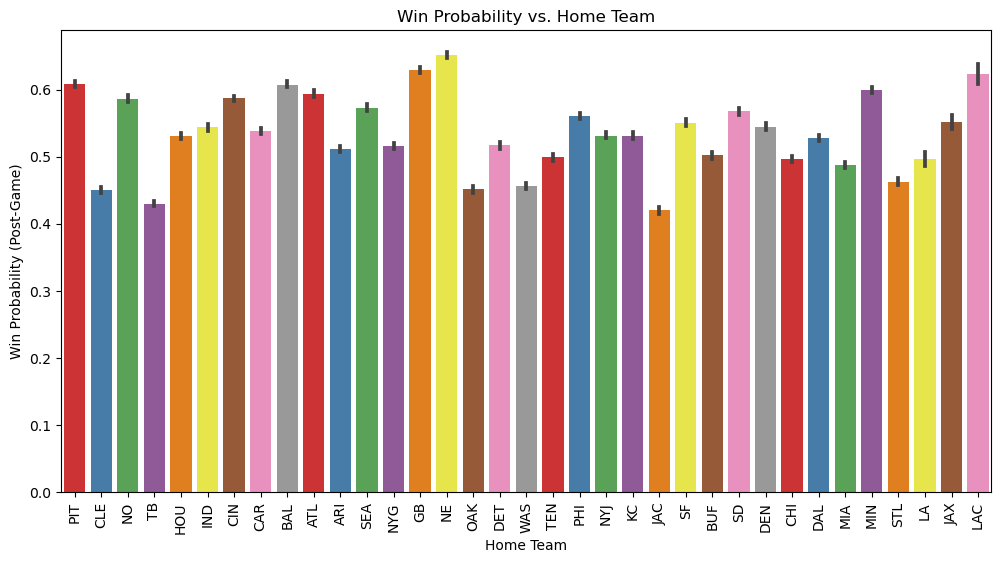

In [37]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Assuming 'HomeTeam' is the column representing home teams, and 'Home_WP_post' is the win probability column
sns.barplot(data=df, x='HomeTeam', y='Home_WP_post', palette='Set1')
plt.xlabel('Home Team')
plt.ylabel('Win Probability (Post-Game)')
plt.title('Win Probability vs. Home Team')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

In [38]:
# Away team advantage For winning

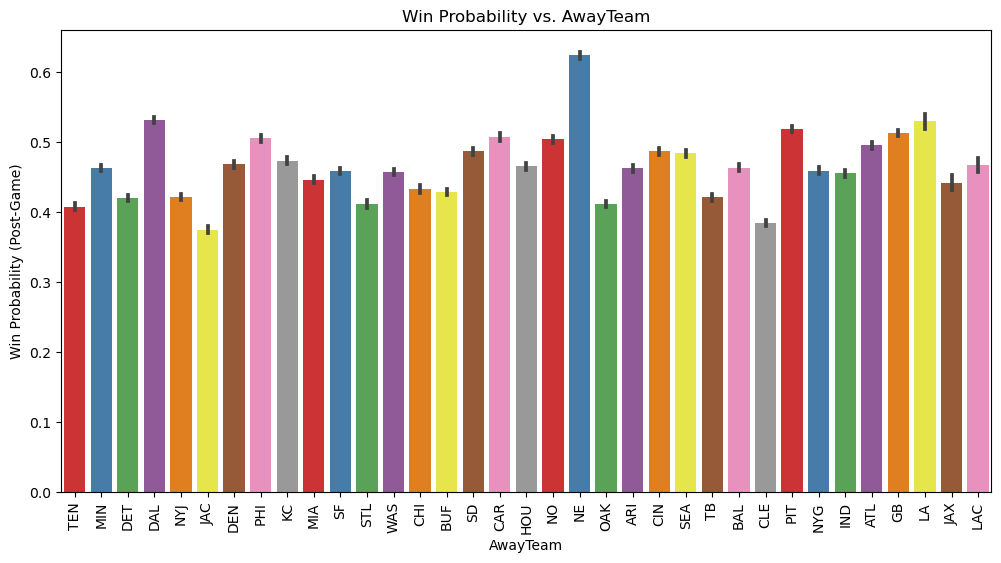

In [39]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Assuming 'HomeTeam' is the column representing home teams, and 'Home_WP_post' is the win probability column
sns.barplot(data=df, x='AwayTeam', y='Away_WP_post', palette='Set1')
plt.xlabel('AwayTeam')
plt.ylabel('Win Probability (Post-Game)')
plt.title('Win Probability vs. AwayTeam')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

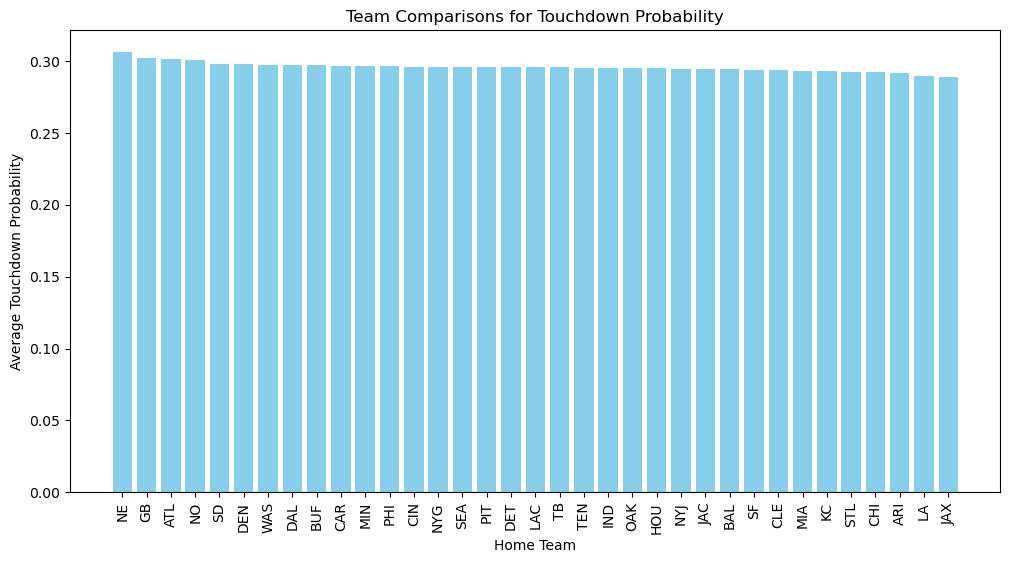

In [40]:
team_touchdown_prob = df.groupby('HomeTeam')['Touchdown_Prob'].mean().reset_index()

# Sort the data by average 'Touchdown_Prob' in descending order for better visualization
team_touchdown_prob = team_touchdown_prob.sort_values(by='Touchdown_Prob', ascending=False)

# Create a bar plot to visualize team comparisons for 'Touchdown_Prob'
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(team_touchdown_prob['HomeTeam'], team_touchdown_prob['Touchdown_Prob'], color='skyblue')
plt.xlabel('Home Team')
plt.ylabel('Average Touchdown Probability')
plt.title('Team Comparisons for Touchdown Probability')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

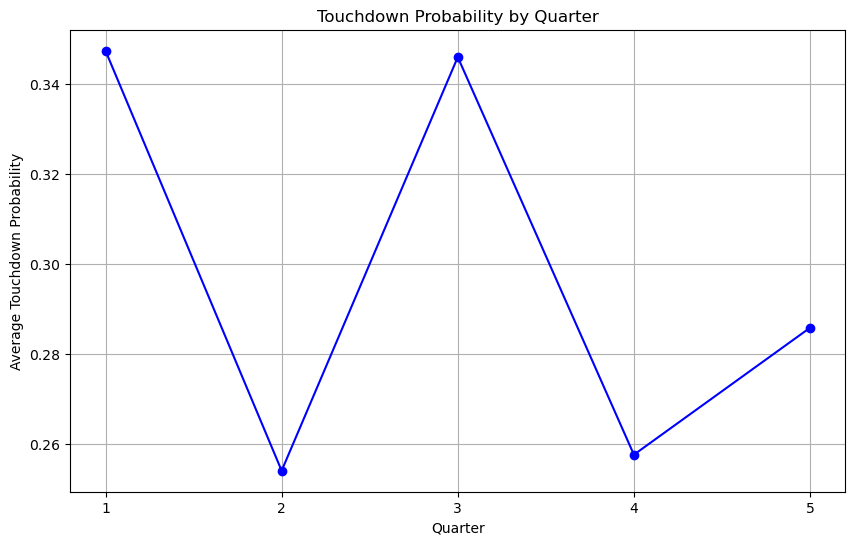

In [41]:
quarterly_touchdown_prob = df.groupby('qtr')['Touchdown_Prob'].mean()

# Create a line plot to visualize how 'Touchdown_Prob' changes by quarter
plt.figure(figsize=(10, 6))
plt.plot(quarterly_touchdown_prob.index, quarterly_touchdown_prob.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Quarter')
plt.ylabel('Average Touchdown Probability')
plt.title('Touchdown Probability by Quarter')
plt.xticks(quarterly_touchdown_prob.index)
plt.grid(True)
plt.show()

# FINDINGS

1) Majority of the play types are Pass and Run.

2) Highest win probabilty is for QB Kneel followed by End of Game Play type.

3) It is observed that home teams tend to have higher post-game win probabilities, we can conclude that home-field advantage plays a significant role in NFL games.

4) We can observe that away team tend to have post-game win probabilities lower than that of a Home team, we can conclude that home-field advantage plays a significant role in NFL games. But the team NE has significant advantage in both Home and away matches, making this team a very tough contender in NFL.

5) We can observe that the probability of touchdown is higher than 0.30 for team NE and rest of the team have a touchdown probability less than 0.30.

6) we can observe that 1st and 3rd Quarter have very high probability of touchdown.

In [42]:
from sklearn.preprocessing import LabelEncoder

object_columns = df.select_dtypes(include=['object'])
object_columns=object_columns.columns

le= LabelEncoder()

for column in object_columns:
    df[column] = le.fit_transform(df[column])

In [43]:
df

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType,Passer_ID,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,Rusher_ID,RushAttempt,Receiver_ID,Reception,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season,time_column,Datecol
0,2009091000,1,1,2.002476,15,3600.0,0.0,35,30.0,30.0,0,0,0.0,0.290675,27,33,1,39,0,0,0,0,4,334,0,0,0,0,0,1070,0,1488,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,27,33,0,25,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,2009,2023-10-01 15:00:00,2009-09-10
1,2009091000,1,1,1.000000,15,3593.0,7.0,29,42.0,58.0,10,5,0.0,0.000000,27,33,1,5,0,0,0,0,6,64,1,-3,8,0,0,1070,0,30,1,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,27,33,0,25,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,2009,2023-10-01 14:53:00,2009-09-10
2,2009091000,1,1,2.000000,15,3556.0,37.0,29,47.0,53.0,5,2,0.0,0.000000,27,33,1,-3,0,0,0,0,10,334,0,0,0,0,0,115,1,1488,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,27,33,0,25,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,2009,2023-10-01 14:16:00,2009-09-10
3,2009091000,1,1,3.000000,14,3515.0,41.0,29,44.0,56.0,8,2,0.0,0.000000,27,33,1,0,0,0,0,0,6,64,1,34,0,0,0,1070,0,503,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,27,33,0,25,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,2009,2023-10-01 13:35:00,2009-09-10
4,2009091000,1,1,4.000000,14,3507.0,8.0,29,44.0,56.0,8,2,0.0,1.000000,27,33,1,0,0,0,0,0,7,334,0,0,0,0,0,1070,0,1488,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,27,33,0,25,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,2009,2023-10-01 13:27:00,2009-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017123101,29,4,2.002476,1,28.0,4.0,3,32.0,32.0,0,-4,0.0,0.000000,34,34,1,0,0,0,0,0,13,334,0,0,0,0,0,1070,0,1488,0,0,0,0,0,0,10.201424,11.414484,-1.187732,7.783541,2,6,1,2,0,3,0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.534487,0.465965,0.534790,0.465614,0.501320,0.000000,2017,2023-10-01 00:28:00,2017-12-31
407684,2017123101,29,4,3.000000,1,28.0,0.0,3,23.0,77.0,14,-4,0.0,0.000000,2,6,1,0,0,0,0,0,6,135,1,12,0,0,0,1070,0,503,0,0,0,0,0,0,27.000000,30.000000,-3.000000,3.000000,2,6,0,25,2,2,0,2,0,0.742694,0.061718,0.003741,0.044487,0.080918,0.000579,0.065863,0.0,0.0,0.200905,-0.340818,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,2017,2023-10-01 00:28:00,2017-12-31
407685,2017123101,29,4,4.000000,1,24.0,4.0,3,23.0,77.0,14,9,0.0,1.000000,2,6,1,13,0,0,0,0,6,135,1,10,3,0,0,1070,0,177,1,0,0,0,0,0,27.000000,30.000000,-3.000000,3.000000,2,6,0,25,2,2,0,2,0,0.770662,0.078899,0.003987,0.053288,0.042817,0.000622,0.049726,0.0,0.0,-0.139913,0.139913,0.050478,0.949522,

# Hypothesis Testing

In [55]:
from scipy import stats
home_team_win_probs = df['Home_WP_post']
away_team_win_probs = df['Away_WP_post']

#significance level (alpha)
alpha = 0.05

# paired t-test
t_statistic, p_value = stats.ttest_ind(home_team_win_probs, away_team_win_probs)

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is evidence to suggest that home teams have a higher mean post-game win probability than away teams.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to conclude that home teams' mean win probabilities are significantly higher than away teams'.")

Reject the null hypothesis
There is evidence to suggest that home teams have a higher mean post-game win probability than away teams.
